# 13 モデルの検証方法とチューニング方法  練習と総合問題解答

- **[13.1 この章で学ぶこと](#13.1-この章で学ぶこと)**
    - [13.1.1 過学習の対処法とモデルチューニング方法](#13.1.1-過学習の対処法とモデルチューニング方法)
    - [13.1.2 混同行列とROC曲線](#13.1.2-混同行列とROC曲線)
    - [13.1.3 シミュレーションと計算統計学の基礎](#13.1.3-シミュレーションと計算統計学の基礎)
    - [13.1.4 アンサンブル学習](#13.1.4-アンサンブル学習)
<br><br>
- **[13.2 過学習の対処法とモデルチューニング方法](#13.2-過学習の対処法とモデルチューニング方法)** 
    - [13.2.1 ホールドアウト法と交差検証法](#13.2.1-ホールドアウト法と交差検証法)
    - [13.2.2 グリッドサーチ](#13.2.2-グリッドサーチ)
    - [13.2.3 モデル構築期間やその他](#13.2.3-モデル構築期間やその他)
    - [13.2.4 特徴量の扱い](#13.2.4-特徴量の扱い)
<br><br> 
- **[13.3 混同行列とROC曲線](#13.3-混同行列とROC曲線)** 
    - [13.3.1 混同行列](#13.3.1-混同行列)
    - [13.3.2 ROC曲線とAUC](#13.3.2-ROC曲線とAUC)
<br><br>
- **[13.4 シミュレーションと計算統計学の基礎](#13.4-シミュレーションと計算統計学の基礎)**
    - [13.4.1 ジャックナイフ法](#13.4.1-ジャックナイフ法)
    - [13.4.2 ブートストラップ法](#13.4.2-ブートストラップ法)
    - [13.4.3 EMアルゴリズム](#13.4.3-EMアルゴリズム)
<br><br>
- **[13.5 アンサンブル学習](#13.5-アンサンブル学習)**
    - [13.5.1 バギング](#13.5.1-バギング)
    - [13.5.2 ブースティング](#13.5.2-ブースティング)
    - [13.5.3 ランダムフォレスト](#13.5.3-ランダムフォレスト)
<br><br>
- **[13.6 総合問題](#13.6-総合問題)**
    - [13.6.1 総合問題1](#13.6.1-総合問題1)
    - [13.6.2 総合問題2](#13.6.2-総合問題2)

## 13.1 この章で学ぶこと
ゴール：モデルを構築するときの注意点や検証の方法の概要を知る

## 13. 過学習の対処法とモデルチューニング方法
ゴール：モデルの過学習を防ぎ、より良い予測モデルを構築する方法を知る

### 13.1 ホールドアウト法と交差検証法
キーワード：過学習、ホールドアウト法、交差検証法

#### <練習問題 1>

上記のデータに対して、異なるモデル（ロジスティック回帰分析など）を作成し、交差検証を実施してみましょう。上記のモデルの結果と比較して、違いはありますか。

In [19]:
# 解答
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# 分析対象データ
from sklearn.datasets import load_breast_cancer

# データの読み込み
cancer = load_breast_cancer()

lgmodel = LogisticRegression()

# 交差検証法
from sklearn.cross_validation import cross_val_score

# cv　で分割数を決定する。デフォルトは3。
scores = cross_val_score(lgmodel,cancer.data,cancer.target,cv=5)

# 93~97%で高め
print("Cross validation scores:{}".format(scores))
print("Cross validation scores(mean):{:.2f}".format(scores.mean()))

Cross validation scores:[ 0.93043478  0.93913043  0.97345133  0.94690265  0.96460177]
Cross validation scores(mean):0.95


### 13.2 グリッドサーチ
キーワード：グリッドサーチ

#### <練習問題 1>

上記のデータに対して、決定木を使って、交差検証とグリッドサーチを実施してみましょう。なお、決定木のパラメータは深さなので、それをparam_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}のように設定して計算しましょう。

In [22]:
# 解答
from sklearn.grid_search import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split

# パラメータの設定
param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}
treemodel = DecisionTreeClassifier()
grid_search = GridSearchCV(treemodel,param_grid,cv=5)

# データの読み込み
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

grid_search.fit(X_train,y_train)

print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Test set score:0.92
Best parameters:{'min_samples_leaf': 4, 'max_depth': 4}
Best cross-validation score:0.94


### 13.3 モデル構築期間やその他
キーワード：データ期間、プロファイリングモデル、予測モデル、検証データ

### 13.4 特徴量の扱い
キーワード：特徴選択、特徴抽出

## 13.3 混同行列とROC曲線
ゴール：混同行列とROC曲線を理解して、実装できる

### 13.3.1 混同行列
キーワード：混同行列、正解率、適合率、再現率、F1値

#### <練習問題 1>

上記のデータに対して、異なるモデル（ロジスティック回帰分析など）を作成し、混同行列を作り、テストデータにおける正解率、適合率、再現率、F1値を計算してみましょう。

In [30]:
# 解答
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# indicators
from sklearn.metrics import precision_score,recall_score,f1_score
# train & test data
from sklearn.cross_validation import train_test_split
# target data
from sklearn.datasets import load_breast_cancer
# confusion matrix
from sklearn.metrics import confusion_matrix

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

model = LogisticRegression()
clf = model.fit(X_train,y_train)

pred_svc = clf.predict(X_test)

print("train(正解率):",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test(正解率):",clf.__class__.__name__ , clf.score(X_test,y_test))

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))
print("適合率:%.3f" % precision_score(y_true=y_test,y_pred=pred_svc))
print("再現率:%.3f" % recall_score(y_true=y_test,y_pred=pred_svc))
print("F1値:%.3f" % f1_score(y_true=y_test,y_pred=pred_svc))

train(正解率): LogisticRegression 0.971830985915
test(正解率): LogisticRegression 0.944055944056
Confution matrix:
[[49  4]
 [ 4 86]]
適合率:0.956
再現率:0.956
F1値:0.956


### 13.3.2 ROC曲線とAUC
キーワード：ROC曲線、AUC

#### <練習問題 1>

irisデータに対して、モデリングを実施（目的変数iris.targetを予測）し、ROC曲線とAUCを計算してみましょう。

/Users/kunitaka/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


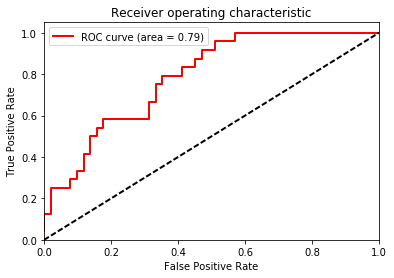

In [1]:
# 解答
#参照URL：http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#データの準備
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

#モデリング
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

## 13.4 シミュレーションと計算統計学の基礎
ゴール：シミュレーションと計算統計学の基本的な考え方を理解し、簡単な実装できること

### 13.4.1 ジャックナイフ法
キーワード：ジャックナイフ法、交差検証法

### 13.4.2 ブートストラップ法
キーワード：ブートストラップ法、復元抽出

### 13.4.3 EMアルゴリズム
キーワード：EMアルゴリズム、最尤法

## 13.5 アンサンブル学習
ゴール：アンサンブルの基本的な手法（バギング、ブースティング、ランダムフォレスト）について理解して、実装ができること

### 13.5.1 バギング
キーワード：バギング

#### <練習問題 1>

以前扱ったirisデータを対象に、バギングを使って、目的変数(iris.target)を予測するモデルを構築し、検証しましょう。また、パラメータとして何を調整しますか。調べて、実行してみましょう。

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 分析対象データ
from sklearn.datasets import load_iris

bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

# data
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

clf =bagging
clf.fit(X_train, y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: BaggingClassifier 0.946428571429
test: BaggingClassifier 1.0


### 13.5.2 ブースティング
キーワード：ブースティング、アダブースト

#### <練習問題 1>

以前扱ったirisデータを対象に、ブースティングを使って、目的変数(iris.target)を予測するモデルを構築し、検証しましょう。また、パラメータとして何を調整しますか。調べて、実行してみましょう。

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
# 分析対象データ
from sklearn.datasets import load_iris
# data
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

clf = AdaBoostClassifier(learning_rate=1.0)
clf.fit(X_train, y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: AdaBoostClassifier 0.955357142857
test: AdaBoostClassifier 0.947368421053


### 13.5.3 ランダムフォレスト
キーワード：ランダムフォレスト、特徴量の重要度

#### <練習問題 1>

以前扱ったirisデータを対象に、ランダムフォレストを使って、目的変数(iris.target)を予測するモデルを構築し、検証しましょう。また、パラメータとして何を調整しますか。調べて、実行してみましょう。

In [ ]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# 分析対象データ
from sklearn.datasets import load_iris

# data
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

f_model=RandomForestClassifier(random_state=0)
clf = f_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

## 13.6 総合問題

### 13.6.1 総合問題1
略

### 13.6.2 総合問題2

データload_breast_cancerを使って、目的変数をcancer.targetとして、予測モデル（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレスト）を構築し、交差検証（5分割）によりどのモデルが一番良いでしょうか。実装してください。

In [8]:
# 解答
# 交差検証法
from sklearn.cross_validation import cross_val_score

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# データ
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

for model in [LogisticRegression(),LinearSVC(), 
              DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=6)
             ,RandomForestClassifier()]:
    scores = cross_val_score(model,cancer.data,cancer.target,cv=5)
    print("-- Method:",model.__class__.__name__ ,"--")
    print("Cross validation scores:{}".format(scores))
    print("Cross validation scores(mean):{}".format(scores.mean()))

-- Method: LogisticRegression --
Cross validation scores:[ 0.93043478  0.93913043  0.97345133  0.94690265  0.96460177]
Cross validation scores(mean):0.9509041939207385
-- Method: LinearSVC --
Cross validation scores:[ 0.90434783  0.91304348  0.94690265  0.92920354  0.92920354]
Cross validation scores(mean):0.92454020777222
-- Method: DecisionTreeClassifier --
Cross validation scores:[ 0.91304348  0.91304348  0.92035398  0.92920354  0.91150442]
Cross validation scores(mean):0.9174297806848788
-- Method: KNeighborsClassifier --
Cross validation scores:[ 0.89565217  0.93913043  0.9380531   0.92920354  0.92035398]
Cross validation scores(mean):0.9244786456329358
-- Method: RandomForestClassifier --
Cross validation scores:[ 0.91304348  0.93913043  0.98230088  0.96460177  0.95575221]
Cross validation scores(mean):0.950965756060023
